In [1]:
#workspace()
addprocs(3)

3-element Array{Int64,1}:
 2
 3
 4

In [2]:
@everywhere include("../src/UNSflow.jl")

LoadError: LoadError: On worker 2:
LoadError: InitError: PyError (:PyImport_ImportModule) None

 in pyerr_check at /Users/kiran/.julia/v0.5/PyCall/src/exception.jl:56 [inlined]
 in pyerr_check at /Users/kiran/.julia/v0.5/PyCall/src/exception.jl:61 [inlined]
 in macro expansion at /Users/kiran/.julia/v0.5/PyCall/src/exception.jl:81 [inlined]
 in pyimport at /Users/kiran/.julia/v0.5/PyCall/src/PyCall.jl:387
 in __init__ at /Users/kiran/.julia/v0.5/PyPlot/src/PyPlot.jl:256
 in _require_from_serialized at ./loading.jl:190
 in _require_search_from_serialized at ./loading.jl:217
 in jlcall__require_search_from_serialized_34134 at /opt/julia/usr/lib/julia/sys.dylib:?
 in require at ./loading.jl:371
 in jlcall_require_22382 at /opt/julia/usr/lib/julia/sys.dylib:?
 in include_string at ./loading.jl:441
 in jlcall_include_string_35097 at /opt/julia/usr/lib/julia/sys.dylib:?
 in include_from_node1 at ./loading.jl:491
 in jlcall_include_from_node1_20159 at /opt/julia/usr/lib/julia/sys.dylib:?
 in eval at ./boot.jl:234
 in jlcall_eval_19783 at /opt/julia/usr/lib/julia/sys.dylib:?
 in #1 at ./multi.jl:1957
 in #625 at ./multi.jl:1421
 in run_work_thunk at ./multi.jl:1001
 in macro expansion at ./multi.jl:1421 [inlined]
 in #624 at ./event.jl:68
during initialization of module PyPlot
while loading /Users/kiran/Documents/Projects/UNSflow/src/UNSflow.jl, in expression starting on line 9
 in #remotecall_fetch#606(::Array{Any,1}, ::Function, ::Function, ::Base.Worker) at ./multi.jl:1070
 in remotecall_fetch(::Function, ::Base.Worker) at ./multi.jl:1062
 in #remotecall_fetch#609(::Array{Any,1}, ::Function, ::Function, ::Int64) at ./multi.jl:1080
 in remotecall_fetch(::Function, ::Int64) at ./multi.jl:1080
 in (::##2#4)() at ./multi.jl:1959

...and 3 other exceptions.

while loading In[2], in expression starting on line 1

In [3]:
@everywhere include("../src/UNSflow.jl")
@everywhere using UNSflow


Use "(eld::EldUpDef)(...)" instead.

Use "(eld::EldUptstartDef)(...)" instead.

Use "(cons::ConstDef)(...)" instead.

Use "(eld::EldRampReturnDef)(...)" instead.

Use "(kin::SinDef)(...)" instead.

Use "(kin::CosDef)(...)" instead.

Use "(eld::EldUpDef)(...)" instead.

Use "(eld::EldUptstartDef)(...)" instead.

Use "(cons::ConstDef)(...)" instead.

Use "(eld::EldRampReturnDef)(...)" instead.

Use "(eld::EldUpDef)(...)" instead.

Use "(eld::EldUptstartDef)(...)" instead.

Use "(cons::ConstDef)(...)" instead.

Use "(eld::EldRampReturnDef)(...)" instead.

Use "(kin::SinDef)(...)" instead.

Use "(kin::CosDef)(...)" instead.

Use "(kin::SinDef)(...)" instead.

Use "(kin::CosDef)(...)" instead.

Use "(eld::EldUpDef)(...)" instead.

Use "(eld::EldUptstartDef)(...)" instead.

Use "(cons::ConstDef)(...)" instead.

Use "(eld::EldRampReturnDef)(...)" instead.

Use "(kin::SinDef)(...)" instead.

Use "(kin::CosDef)(...)" instead.
  likely near /Users/kiran/Documents/Projects/UNSflow/src/types.jl:2

In [4]:
#Construct dimensionless quantities from given values
c_d = 0.2
b_d = 6
AR = b_d/c_d

u_d = 10
f_d = 0.8889
k = 2*pi*f_d*c_d/(2*u_d)

#_dAll values below are nondimensional
c = 1
u = 1
w = 2*k
T = (2*pi/w)
ncyc = 4
t_tot = ncyc*T 

modedata = readdlm("../test/anto_mode1.dat");
mode_spl = Spline1D(modedata[:,3],modedata[:,4])

Spline1D(knots=[-2.994,-2.9615 … 2.9615,2.994] (78 elements), k=3, extrapolation="nearest", residual=0.0)

In [5]:
Tn = T*c_d/u_d
dlt = readcsv("../test/anto_cl.csv")
dlt = dlt[2:end,:]
t_ant = dlt[:,1]/Tn

len = indmin(abs(t_ant-1))

ant_steady = 0.4946
ant_ocl = dlt[:,2] - ant_steady

234-element Array{Float64,1}:
 -0.0801412 
 -0.0745103 
 -0.0703989 
 -0.0627126 
 -0.0534174 
 -0.0479952 
 -0.0426922 
 -0.0308947 
 -0.0260684 
 -0.0206166 
 -0.0140921 
 -0.00551217
  0.00333587
  ⋮         
 -0.0978652 
 -0.110105  
 -0.123147  
 -0.126897  
 -0.128645  
 -0.125997  
 -0.115358  
 -0.110441  
 -0.104184  
 -0.100073  
 -0.0956037 
 -0.0922071 

# 2% of the bending mode

In [6]:
n_span = 12
n_bterm = 40

psi = zeros(n_span)
dpsi = pi/n_span

for i = 1:n_span
    psi[i] = (real(i)-0.5)*dpsi
end

scale = 0.02


0.02

In [9]:
#Run LDVM at all these locations:
alpha_amp = 5*pi/180

h_amp = zeros(n_span)
for i = 1:n_span   
    y_d = -b_d*cos(psi[i])/2.
    h_amp[i] = evaluate(mode_spl,y_d)*scale/c_d
end

dtstar = min(0.015*8,0.015*0.2*2/(k*maximum(h_amp)))
nsteps = round(Int,t_tot/dtstar)+1

alphadef = ConstDef(alpha_amp)
udef = ConstDef(u)
pvt = 0.0 #Doesnt matter, no pitch
lespcrit = [21;] #high value to turn off LEV shedding


W_mat = Array{Float64,2}[]
W_surf = TwoDSurf[]
W_curfield = TwoDFlowField[]

surf_in = TwoDSurf[]
field_in = TwoDFlowField[]
n_in = Int64[]
dt_in = Float64[]
del_in = DelVortDef[]

for i = 1:Int(n_span/2)
    hdef = CosDef(0., h_amp[i], w, 0.)
    full_kinem = KinemDef(alphadef, hdef, udef)
    surf = TwoDSurf("FlatPlate", pvt, full_kinem, lespcrit)
    curfield = TwoDFlowField()
    del = DelVortDef(1, 500, 10)
    push!(surf_in,surf)
    push!(field_in, curfield)
    push!(n_in,nsteps,)
    push!(dt_in,dtstar)
    push!(del_in,del)
end

@time fullsol = pmap((a1,a2,a3,a4,a5)->ldvm(a1,a2,a3,a4),surf_in,field_in,n_in,dt_in,del_in)

for i = 1:Int(n_span/2)
    push!(W_mat,fullsol[i][1])
    push!(W_surf, fullsol[i][2])
    push!(W_curfield, fullsol[i][3])
end
    

161.608034 seconds (512.26 k allocations: 19.224 MB, 0.01% gc time)


In [10]:
nsteps

1876

In [11]:

#Mirror image for the rest of the span
for i = Int(n_span/2)+1:n_span
    mt = W_mat[n_span - i + 1]
    st = W_surf[n_span - i + 1]
    ct = W_curfield[n_span - i + 1]
    push!(W_mat, mt)
    push!(W_surf, st)
    push!(W_curfield, ct)
end

lhs = zeros(n_span,n_bterm)
rhs = zeros(n_span)
b_coeff = zeros(nsteps,n_bterm)

dt = W_mat[1][2,1] - W_mat[1][1,1]

cnc_f = zeros(nsteps)
cnnc_f = zeros(nsteps)

bdot = zeros(nsteps,n_bterm)

for i = 1:nsteps
    for j = 1:n_span
        for n = 1:n_bterm
            lhs[j,n] = sin(n*psi[j])*(sin(psi[j]) + (n*pi/(2*AR)))
        end
        rhs[j] = pi*sin(psi[j])*W_mat[j][i,9]/(2*AR)
    end
        
    b_coeff[i,:] = \(lhs, rhs)
    if i >= 2   
        bdot[i,:] = (b_coeff[i,:] - b_coeff[i-1,:])/dt
    end
       
end

a03d = zeros(nsteps,n_span)
cd_ind = zeros(nsteps)
a0dot3d = zeros(nsteps,n_span)


for i = 1:nsteps
    cd_ind[i] = 0
    for n = 1:n_bterm
        cd_ind[i] = cd_ind[i] + real(n)*b_coeff[i,n]^2
    end
    cd_ind[i] = cd_ind[i]*pi*AR
    for j = 1:n_span
        a03d[i,j] = 0
        for n = 1:n_bterm
            a03d[i,j] = a03d[i,j] - real(n)*b_coeff[i,n]*sin(n*psi[j])/sin(psi[j])
            a0dot3d[i,j] = a0dot3d[i,j] - real(n)*bdot[i,n]*sin(n*psi[j])/sin(psi[j])
        end
    end
end

W_alpha = zeros(nsteps,n_span)
W_h = zeros(nsteps,n_span)
W_hdot = zeros(nsteps,n_span)
W_u = zeros(nsteps,n_span)
W_u[:,:] = 1
W_alpha[:,:] = 5*pi/180
for i = 1:nsteps
    for j = 1:n_span
        hdef = CosDef(0., h_amp[j], w, 0.)
        tt = W_mat[1][i,1]    
        W_h[i,j] = hdef(tt)*c
        W_hdot[i,j] = ForwardDiff.derivative(hdef,tt)*u
    end
end

W_cn = zeros(nsteps)
W_cs = zeros(nsteps)
W_cl = zeros(nsteps)
W_cd = zeros(nsteps)
W_cdi = zeros(nsteps)

cn3d = zeros(nsteps, n_span)
cs3d = zeros(nsteps, n_span)
cl3d = zeros(nsteps, n_span)
cd3d = zeros(nsteps, n_span)

for i = 1:nsteps
    W_cn[i] = 0
    W_cs[i] = 0
    for j = 1:n_span
        cn3d[i,j] = W_mat[j][i,10] + (2*pi/u)*(W_u[i,j]*cos(W_alpha[i,j]) + W_hdot[i,j]*sin(W_alpha[i,j]))*a03d[1,j] + (2*pi*c/u)*(3*a0dot3d[i,j]/4)
        cs3d[i,j] = W_mat[j][i,11] + 2*pi*a03d[i,j]^2
        cl3d[i,j] = cn3d[i,j]*cos(W_alpha[i,j]) + cs3d[i,j]*sin(W_alpha[i,j])
        cd3d[i,j] = cn3d[i,j]*sin(W_alpha[i,j]) - cs3d[i,j]*cos(W_alpha[i,j]) 
        W_cn[i] = W_cn[i] + cn3d[i,j]*sin(psi[j])*dpsi/2
        W_cs[i] = W_cs[i] + cs3d[i,j]*sin(psi[j])*dpsi/2
        W_cl[i] = W_cl[i] + cl3d[i,j]*sin(psi[j])*dpsi/2
        W_cd[i] = W_cd[i] + cd3d[i,j]*sin(psi[j])*dpsi/2
    end
end
    

In [12]:
t_th = W_mat[1][:,1]*c_d/u_d

range = round(Int,(ncyc-1)*nsteps/ncyc)+1:nsteps
tbyT = (t_th[range]-t_th[range[1]])/Tn

kr_spl = Spline1D(tbyT,W_cl[range])
kr_eval = evaluate(kr_spl,t_ant)

ant_cl = ant_steady + ant_ocl*scale

len = indmin(abs(t_ant-1))

err = Array(Float64,len)
for i = 1:len
    err[i] = (ant_cl[i] - kr_eval[i])/ant_cl[i] 
end
rms_err = sqrt(mean(err.^2))*100



4.3328626640109125

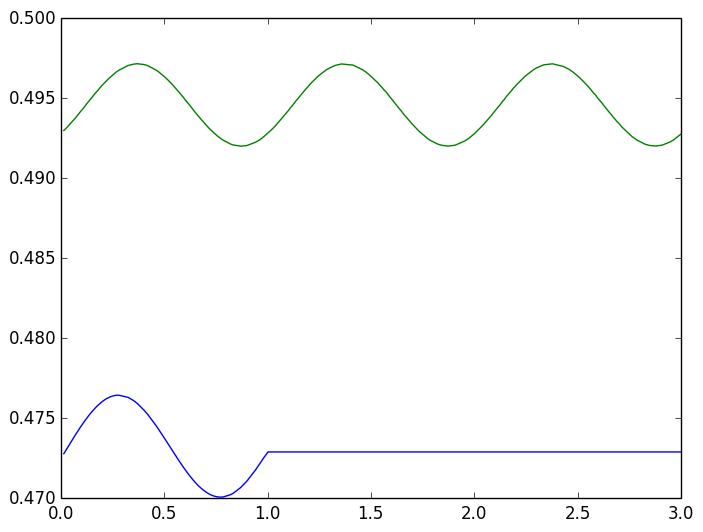

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x319327690>

In [13]:
plot(t_ant,kr_eval)
plot(t_ant,ant_cl)

### 10% scale 

In [20]:
n_span = 12
n_bterm = 40

psi = zeros(n_span)
dpsi = pi/n_span

for i = 1:n_span
    psi[i] = (real(i)-0.5)*dpsi
end

scale = 0.1





0.1

In [21]:
#Run LDVM at all these locations:
alpha_amp = 5*pi/180

h_amp = zeros(n_span)
for i = 1:n_span   
    y_d = -b_d*cos(psi[i])/2.
    h_amp[i] = evaluate(mode_spl,y_d)*scale/c_d
end

dtstar = min(0.015*8,0.015*0.2*2/(k*maximum(h_amp)))
nsteps = round(Int,t_tot/dtstar)+1

alphadef = ConstDef(alpha_amp)
udef = ConstDef(u)
pvt = 0.0 #Doesnt matter, no pitch
lespcrit = [21;] #high value to turn off LEV shedding


W_mat = Array{Float64,2}[]
W_surf = TwoDSurf[]
W_curfield = TwoDFlowField[]

surf_in = TwoDSurf[]
field_in = TwoDFlowField[]
n_in = Int64[]
dt_in = Float64[]
del_in = DelVortDef[]

for i = 1:Int(n_span/2)
    hdef = CosDef(0., h_amp[i], w, 0.)
    full_kinem = KinemDef(alphadef, hdef, udef)
    surf = TwoDSurf("FlatPlate", pvt, full_kinem, lespcrit)
    curfield = TwoDFlowField()
    del = DelVortDef(1, 500, 10)
    push!(surf_in,surf)
    push!(field_in, curfield)
    push!(n_in,nsteps,)
    push!(dt_in,dtstar)
    push!(del_in,del)
end

@time fullsol = pmap((a1,a2,a3,a4,a5)->ldvm(a1,a2,a3,a4),surf_in,field_in,n_in,dt_in,del_in)

for i = 1:Int(n_span/2)
    push!(W_mat,fullsol[i][1])
    push!(W_surf, fullsol[i][2])
    push!(W_curfield, fullsol[i][3])
end
    

175.030673 seconds (511.95 k allocations: 18.833 MB, 0.00% gc time)


In [22]:

#Mirror image for the rest of the span
for i = Int(n_span/2)+1:n_span
    mt = W_mat[n_span - i + 1]
    st = W_surf[n_span - i + 1]
    ct = W_curfield[n_span - i + 1]
    push!(W_mat, mt)
    push!(W_surf, st)
    push!(W_curfield, ct)
end

lhs = zeros(n_span,n_bterm)
rhs = zeros(n_span)
b_coeff = zeros(nsteps,n_bterm)

dt = W_mat[1][2,1] - W_mat[1][1,1]

cnc_f = zeros(nsteps)
cnnc_f = zeros(nsteps)

bdot = zeros(nsteps,n_bterm)

for i = 1:nsteps
    for j = 1:n_span
        for n = 1:n_bterm
            lhs[j,n] = sin(n*psi[j])*(sin(psi[j]) + (n*pi/(2*AR)))
        end
        rhs[j] = pi*sin(psi[j])*W_mat[j][i,9]/(2*AR)
    end
        
    b_coeff[i,:] = \(lhs, rhs)
    if i >= 2   
        bdot[i,:] = (b_coeff[i,:] - b_coeff[i-1,:])/dt
    end
       
end

a03d = zeros(nsteps,n_span)
cd_ind = zeros(nsteps)
a0dot3d = zeros(nsteps,n_span)


for i = 1:nsteps
    cd_ind[i] = 0
    for n = 1:n_bterm
        cd_ind[i] = cd_ind[i] + real(n)*b_coeff[i,n]^2
    end
    cd_ind[i] = cd_ind[i]*pi*AR
    for j = 1:n_span
        a03d[i,j] = 0
        for n = 1:n_bterm
            a03d[i,j] = a03d[i,j] - real(n)*b_coeff[i,n]*sin(n*psi[j])/sin(psi[j])
            a0dot3d[i,j] = a0dot3d[i,j] - real(n)*bdot[i,n]*sin(n*psi[j])/sin(psi[j])
        end
    end
end

W_alpha = zeros(nsteps,n_span)
W_h = zeros(nsteps,n_span)
W_hdot = zeros(nsteps,n_span)
W_u = zeros(nsteps,n_span)
W_u[:,:] = 1
W_alpha[:,:] = 5*pi/180
for i = 1:nsteps
    for j = 1:n_span
        hdef = CosDef(0., h_amp[j], w, 0.)
        tt = W_mat[1][i,1]    
        W_h[i,j] = hdef(tt)*c
        W_hdot[i,j] = ForwardDiff.derivative(hdef,tt)*u
    end
end

W_cn = zeros(nsteps)
W_cs = zeros(nsteps)
W_cl = zeros(nsteps)
W_cd = zeros(nsteps)
W_cdi = zeros(nsteps)

cn3d = zeros(nsteps, n_span)
cs3d = zeros(nsteps, n_span)
cl3d = zeros(nsteps, n_span)
cd3d = zeros(nsteps, n_span)

for i = 1:nsteps
    W_cn[i] = 0
    W_cs[i] = 0
    for j = 1:n_span
        cn3d[i,j] = W_mat[j][i,10] + (2*pi/u)*(W_u[i,j]*cos(W_alpha[i,j]) + W_hdot[i,j]*sin(W_alpha[i,j]))*a03d[1,j] + (2*pi*c/u)*(3*a0dot3d[i,j]/4)
        cs3d[i,j] = W_mat[j][i,11] + 2*pi*a03d[i,j]^2
        cl3d[i,j] = cn3d[i,j]*cos(W_alpha[i,j]) + cs3d[i,j]*sin(W_alpha[i,j])
        cd3d[i,j] = cn3d[i,j]*sin(W_alpha[i,j]) - cs3d[i,j]*cos(W_alpha[i,j]) 
        W_cn[i] = W_cn[i] + cn3d[i,j]*sin(psi[j])*dpsi/2
        W_cs[i] = W_cs[i] + cs3d[i,j]*sin(psi[j])*dpsi/2
        W_cl[i] = W_cl[i] + cl3d[i,j]*sin(psi[j])*dpsi/2
        W_cd[i] = W_cd[i] + cd3d[i,j]*sin(psi[j])*dpsi/2
    end
end
    

t_th = W_mat[1][:,1]*c_d/u_d

range = round(Int,(ncyc-1)*nsteps/ncyc)+1:nsteps
tbyT = (t_th[range]-t_th[range[1]])/Tn

kr_spl = Spline1D(tbyT,W_cl[range])
kr_eval = evaluate(kr_spl,t_ant)

ant_cl = ant_steady + ant_ocl*scale

len = indmin(abs(t_ant-1))

err = Array(Float64,len)
for i = 1:len
    err[i] = (ant_cl[i] - kr_eval[i])/ant_cl[i] 
end
rms_err = sqrt(mean(err.^2))*100




4.601797877522341

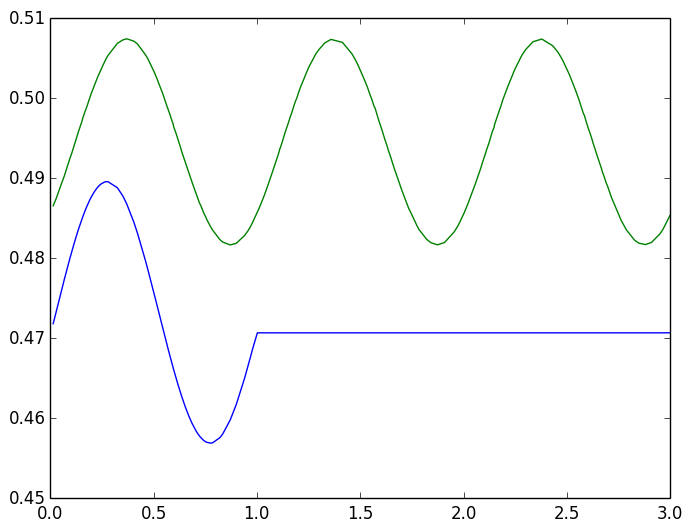

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x319f50d50>

In [23]:
plot(t_ant,kr_eval)
plot(t_ant,ant_cl)

### 25% scale 

In [24]:
n_span = 12
n_bterm = 40

psi = zeros(n_span)
dpsi = pi/n_span

for i = 1:n_span
    psi[i] = (real(i)-0.5)*dpsi
end

scale = 0.25


0.25

In [25]:
#Run LDVM at all these locations:
alpha_amp = 5*pi/180

h_amp = zeros(n_span)
for i = 1:n_span   
    y_d = -b_d*cos(psi[i])/2.
    h_amp[i] = evaluate(mode_spl,y_d)*scale/c_d
end

dtstar = min(0.015*8,0.015*0.2*2/(k*maximum(h_amp)))
nsteps = round(Int,t_tot/dtstar)+1

alphadef = ConstDef(alpha_amp)
udef = ConstDef(u)
pvt = 0.0 #Doesnt matter, no pitch
lespcrit = [21;] #high value to turn off LEV shedding


W_mat = Array{Float64,2}[]
W_surf = TwoDSurf[]
W_curfield = TwoDFlowField[]

surf_in = TwoDSurf[]
field_in = TwoDFlowField[]
n_in = Int64[]
dt_in = Float64[]
del_in = DelVortDef[]

for i = 1:Int(n_span/2)
    hdef = CosDef(0., h_amp[i], w, 0.)
    full_kinem = KinemDef(alphadef, hdef, udef)
    surf = TwoDSurf("FlatPlate", pvt, full_kinem, lespcrit)
    curfield = TwoDFlowField()
    del = DelVortDef(1, 500, 10)
    push!(surf_in,surf)
    push!(field_in, curfield)
    push!(n_in,nsteps,)
    push!(dt_in,dtstar)
    push!(del_in,del)
end

@time fullsol = pmap((a1,a2,a3,a4,a5)->ldvm(a1,a2,a3,a4),surf_in,field_in,n_in,dt_in,del_in)

for i = 1:Int(n_span/2)
    push!(W_mat,fullsol[i][1])
    push!(W_surf, fullsol[i][2])
    push!(W_curfield, fullsol[i][3])
end
    

175.961643 seconds (410.67 k allocations: 14.652 MB)


In [26]:

#Mirror image for the rest of the span
for i = Int(n_span/2)+1:n_span
    mt = W_mat[n_span - i + 1]
    st = W_surf[n_span - i + 1]
    ct = W_curfield[n_span - i + 1]
    push!(W_mat, mt)
    push!(W_surf, st)
    push!(W_curfield, ct)
end

lhs = zeros(n_span,n_bterm)
rhs = zeros(n_span)
b_coeff = zeros(nsteps,n_bterm)

dt = W_mat[1][2,1] - W_mat[1][1,1]

cnc_f = zeros(nsteps)
cnnc_f = zeros(nsteps)

bdot = zeros(nsteps,n_bterm)

for i = 1:nsteps
    for j = 1:n_span
        for n = 1:n_bterm
            lhs[j,n] = sin(n*psi[j])*(sin(psi[j]) + (n*pi/(2*AR)))
        end
        rhs[j] = pi*sin(psi[j])*W_mat[j][i,9]/(2*AR)
    end
        
    b_coeff[i,:] = \(lhs, rhs)
    if i >= 2   
        bdot[i,:] = (b_coeff[i,:] - b_coeff[i-1,:])/dt
    end
       
end

a03d = zeros(nsteps,n_span)
cd_ind = zeros(nsteps)
a0dot3d = zeros(nsteps,n_span)


for i = 1:nsteps
    cd_ind[i] = 0
    for n = 1:n_bterm
        cd_ind[i] = cd_ind[i] + real(n)*b_coeff[i,n]^2
    end
    cd_ind[i] = cd_ind[i]*pi*AR
    for j = 1:n_span
        a03d[i,j] = 0
        for n = 1:n_bterm
            a03d[i,j] = a03d[i,j] - real(n)*b_coeff[i,n]*sin(n*psi[j])/sin(psi[j])
            a0dot3d[i,j] = a0dot3d[i,j] - real(n)*bdot[i,n]*sin(n*psi[j])/sin(psi[j])
        end
    end
end

W_alpha = zeros(nsteps,n_span)
W_h = zeros(nsteps,n_span)
W_hdot = zeros(nsteps,n_span)
W_u = zeros(nsteps,n_span)
W_u[:,:] = 1
W_alpha[:,:] = 5*pi/180
for i = 1:nsteps
    for j = 1:n_span
        hdef = CosDef(0., h_amp[j], w, 0.)
        tt = W_mat[1][i,1]    
        W_h[i,j] = hdef(tt)*c
        W_hdot[i,j] = ForwardDiff.derivative(hdef,tt)*u
    end
end

W_cn = zeros(nsteps)
W_cs = zeros(nsteps)
W_cl = zeros(nsteps)
W_cd = zeros(nsteps)
W_cdi = zeros(nsteps)

cn3d = zeros(nsteps, n_span)
cs3d = zeros(nsteps, n_span)
cl3d = zeros(nsteps, n_span)
cd3d = zeros(nsteps, n_span)

for i = 1:nsteps
    W_cn[i] = 0
    W_cs[i] = 0
    for j = 1:n_span
        cn3d[i,j] = W_mat[j][i,10] + (2*pi/u)*(W_u[i,j]*cos(W_alpha[i,j]) + W_hdot[i,j]*sin(W_alpha[i,j]))*a03d[1,j] + (2*pi*c/u)*(3*a0dot3d[i,j]/4)
        cs3d[i,j] = W_mat[j][i,11] + 2*pi*a03d[i,j]^2
        cl3d[i,j] = cn3d[i,j]*cos(W_alpha[i,j]) + cs3d[i,j]*sin(W_alpha[i,j])
        cd3d[i,j] = cn3d[i,j]*sin(W_alpha[i,j]) - cs3d[i,j]*cos(W_alpha[i,j]) 
        W_cn[i] = W_cn[i] + cn3d[i,j]*sin(psi[j])*dpsi/2
        W_cs[i] = W_cs[i] + cs3d[i,j]*sin(psi[j])*dpsi/2
        W_cl[i] = W_cl[i] + cl3d[i,j]*sin(psi[j])*dpsi/2
        W_cd[i] = W_cd[i] + cd3d[i,j]*sin(psi[j])*dpsi/2
    end
end
    

t_th = W_mat[1][:,1]*c_d/u_d

range = round(Int,(ncyc-1)*nsteps/ncyc)+1:nsteps
tbyT = (t_th[range]-t_th[range[1]])/Tn

kr_spl = Spline1D(tbyT,W_cl[range])
kr_eval = evaluate(kr_spl,t_ant)

ant_cl = ant_steady + ant_ocl*scale

len = indmin(abs(t_ant-1))

err = Array(Float64,len)
for i = 1:len
    err[i] = (ant_cl[i] - kr_eval[i])/ant_cl[i] 
end
rms_err = sqrt(mean(err.^2))*100





5.809515307820985

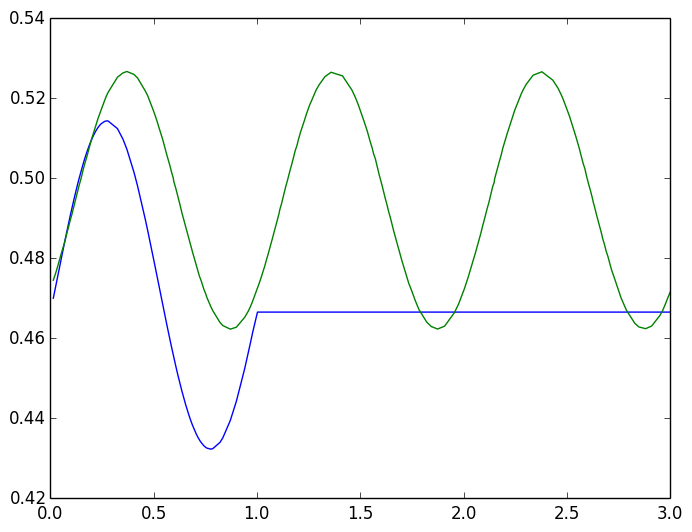

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31a4f00d0>

In [27]:
plot(t_ant,kr_eval)
plot(t_ant,ant_cl)

### 50% scale 


In [28]:
n_span = 12
n_bterm = 40

psi = zeros(n_span)
dpsi = pi/n_span

for i = 1:n_span
    psi[i] = (real(i)-0.5)*dpsi
end

scale = 0.5







0.5

In [29]:
#Run LDVM at all these locations:
alpha_amp = 5*pi/180

h_amp = zeros(n_span)
for i = 1:n_span   
    y_d = -b_d*cos(psi[i])/2.
    h_amp[i] = evaluate(mode_spl,y_d)*scale/c_d
end

dtstar = min(0.015*8,0.015*0.2*2/(k*maximum(h_amp)))
nsteps = round(Int,t_tot/dtstar)+1

alphadef = ConstDef(alpha_amp)
udef = ConstDef(u)
pvt = 0.0 #Doesnt matter, no pitch
lespcrit = [21;] #high value to turn off LEV shedding


W_mat = Array{Float64,2}[]
W_surf = TwoDSurf[]
W_curfield = TwoDFlowField[]

surf_in = TwoDSurf[]
field_in = TwoDFlowField[]
n_in = Int64[]
dt_in = Float64[]
del_in = DelVortDef[]

for i = 1:Int(n_span/2)
    hdef = CosDef(0., h_amp[i], w, 0.)
    full_kinem = KinemDef(alphadef, hdef, udef)
    surf = TwoDSurf("FlatPlate", pvt, full_kinem, lespcrit)
    curfield = TwoDFlowField()
    del = DelVortDef(1, 500, 10)
    push!(surf_in,surf)
    push!(field_in, curfield)
    push!(n_in,nsteps,)
    push!(dt_in,dtstar)
    push!(del_in,del)
end

@time fullsol = pmap((a1,a2,a3,a4,a5)->ldvm(a1,a2,a3,a4),surf_in,field_in,n_in,dt_in,del_in)

for i = 1:Int(n_span/2)
    push!(W_mat,fullsol[i][1])
    push!(W_surf, fullsol[i][2])
    push!(W_curfield, fullsol[i][3])
end
    

331.961381 seconds (467.72 k allocations: 16.575 MB, 0.01% gc time)


In [30]:

#Mirror image for the rest of the span
for i = Int(n_span/2)+1:n_span
    mt = W_mat[n_span - i + 1]
    st = W_surf[n_span - i + 1]
    ct = W_curfield[n_span - i + 1]
    push!(W_mat, mt)
    push!(W_surf, st)
    push!(W_curfield, ct)
end

lhs = zeros(n_span,n_bterm)
rhs = zeros(n_span)
b_coeff = zeros(nsteps,n_bterm)

dt = W_mat[1][2,1] - W_mat[1][1,1]

cnc_f = zeros(nsteps)
cnnc_f = zeros(nsteps)

bdot = zeros(nsteps,n_bterm)

for i = 1:nsteps
    for j = 1:n_span
        for n = 1:n_bterm
            lhs[j,n] = sin(n*psi[j])*(sin(psi[j]) + (n*pi/(2*AR)))
        end
        rhs[j] = pi*sin(psi[j])*W_mat[j][i,9]/(2*AR)
    end
        
    b_coeff[i,:] = \(lhs, rhs)
    if i >= 2   
        bdot[i,:] = (b_coeff[i,:] - b_coeff[i-1,:])/dt
    end
       
end

a03d = zeros(nsteps,n_span)
cd_ind = zeros(nsteps)
a0dot3d = zeros(nsteps,n_span)


for i = 1:nsteps
    cd_ind[i] = 0
    for n = 1:n_bterm
        cd_ind[i] = cd_ind[i] + real(n)*b_coeff[i,n]^2
    end
    cd_ind[i] = cd_ind[i]*pi*AR
    for j = 1:n_span
        a03d[i,j] = 0
        for n = 1:n_bterm
            a03d[i,j] = a03d[i,j] - real(n)*b_coeff[i,n]*sin(n*psi[j])/sin(psi[j])
            a0dot3d[i,j] = a0dot3d[i,j] - real(n)*bdot[i,n]*sin(n*psi[j])/sin(psi[j])
        end
    end
end

W_alpha = zeros(nsteps,n_span)
W_h = zeros(nsteps,n_span)
W_hdot = zeros(nsteps,n_span)
W_u = zeros(nsteps,n_span)
W_u[:,:] = 1
W_alpha[:,:] = 5*pi/180
for i = 1:nsteps
    for j = 1:n_span
        hdef = CosDef(0., h_amp[j], w, 0.)
        tt = W_mat[1][i,1]    
        W_h[i,j] = hdef(tt)*c
        W_hdot[i,j] = ForwardDiff.derivative(hdef,tt)*u
    end
end

W_cn = zeros(nsteps)
W_cs = zeros(nsteps)
W_cl = zeros(nsteps)
W_cd = zeros(nsteps)
W_cdi = zeros(nsteps)

cn3d = zeros(nsteps, n_span)
cs3d = zeros(nsteps, n_span)
cl3d = zeros(nsteps, n_span)
cd3d = zeros(nsteps, n_span)

for i = 1:nsteps
    W_cn[i] = 0
    W_cs[i] = 0
    for j = 1:n_span
        cn3d[i,j] = W_mat[j][i,10] + (2*pi/u)*(W_u[i,j]*cos(W_alpha[i,j]) + W_hdot[i,j]*sin(W_alpha[i,j]))*a03d[1,j] + (2*pi*c/u)*(3*a0dot3d[i,j]/4)
        cs3d[i,j] = W_mat[j][i,11] + 2*pi*a03d[i,j]^2
        cl3d[i,j] = cn3d[i,j]*cos(W_alpha[i,j]) + cs3d[i,j]*sin(W_alpha[i,j])
        cd3d[i,j] = cn3d[i,j]*sin(W_alpha[i,j]) - cs3d[i,j]*cos(W_alpha[i,j]) 
        W_cn[i] = W_cn[i] + cn3d[i,j]*sin(psi[j])*dpsi/2
        W_cs[i] = W_cs[i] + cs3d[i,j]*sin(psi[j])*dpsi/2
        W_cl[i] = W_cl[i] + cl3d[i,j]*sin(psi[j])*dpsi/2
        W_cd[i] = W_cd[i] + cd3d[i,j]*sin(psi[j])*dpsi/2
    end
end
    

t_th = W_mat[1][:,1]*c_d/u_d

range = round(Int,(ncyc-1)*nsteps/ncyc)+1:nsteps
tbyT = (t_th[range]-t_th[range[1]])/Tn

kr_spl = Spline1D(tbyT,W_cl[range])
kr_eval = evaluate(kr_spl,t_ant)

ant_cl = ant_steady + ant_ocl*scale

len = indmin(abs(t_ant-1))

err = Array(Float64,len)
for i = 1:len
    err[i] = (ant_cl[i] - kr_eval[i])/ant_cl[i] 
end
rms_err = sqrt(mean(err.^2))*100




8.077065913904063

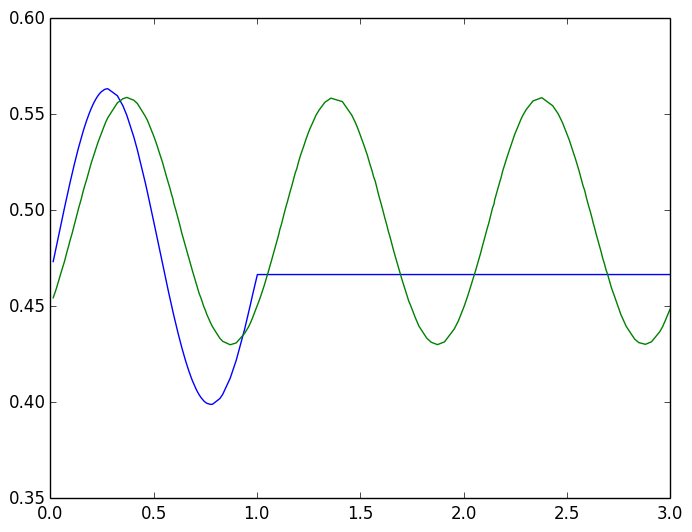

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31abfe490>

In [31]:
plot(t_ant,kr_eval)
plot(t_ant,ant_cl)

### 75% scale 


In [45]:
n_span = 12
n_bterm = 40

psi = zeros(n_span)
dpsi = pi/n_span

for i = 1:n_span
    psi[i] = (real(i)-0.5)*dpsi
end

scale = 0.75








0.75

In [ ]:
#Run LDVM at all these locations:
alpha_amp = 5*pi/180

h_amp = zeros(n_span)
for i = 1:n_span   
    y_d = -b_d*cos(psi[i])/2.
    h_amp[i] = evaluate(mode_spl,y_d)*scale/c_d
end

dtstar = min(0.015*8,0.015*0.2*2/(k*maximum(h_amp)))
nsteps = round(Int,t_tot/dtstar)+1

alphadef = ConstDef(alpha_amp)
udef = ConstDef(u)
pvt = 0.0 #Doesnt matter, no pitch
lespcrit = [21;] #high value to turn off LEV shedding


W_mat = Array{Float64,2}[]
W_surf = TwoDSurf[]
W_curfield = TwoDFlowField[]

surf_in = TwoDSurf[]
field_in = TwoDFlowField[]
n_in = Int64[]
dt_in = Float64[]
del_in = DelVortDef[]

for i = 1:Int(n_span/2)
    hdef = CosDef(0., h_amp[i], w, 0.)
    full_kinem = KinemDef(alphadef, hdef, udef)
    surf = TwoDSurf("FlatPlate", pvt, full_kinem, lespcrit)
    curfield = TwoDFlowField()
    del = DelVortDef(1, 500, 10)
    push!(surf_in,surf)
    push!(field_in, curfield)
    push!(n_in,nsteps,)
    push!(dt_in,dtstar)
    push!(del_in,del)
end

@time fullsol = pmap((a1,a2,a3,a4,a5)->ldvm(a1,a2,a3,a4),surf_in,field_in,n_in,dt_in,del_in)

for i = 1:Int(n_span/2)
    push!(W_mat,fullsol[i][1])
    push!(W_surf, fullsol[i][2])
    push!(W_curfield, fullsol[i][3])
end
    

In [ ]:

#Mirror image for the rest of the span
for i = Int(n_span/2)+1:n_span
    mt = W_mat[n_span - i + 1]
    st = W_surf[n_span - i + 1]
    ct = W_curfield[n_span - i + 1]
    push!(W_mat, mt)
    push!(W_surf, st)
    push!(W_curfield, ct)
end

lhs = zeros(n_span,n_bterm)
rhs = zeros(n_span)
b_coeff = zeros(nsteps,n_bterm)

dt = W_mat[1][2,1] - W_mat[1][1,1]

cnc_f = zeros(nsteps)
cnnc_f = zeros(nsteps)

bdot = zeros(nsteps,n_bterm)

for i = 1:nsteps
    for j = 1:n_span
        for n = 1:n_bterm
            lhs[j,n] = sin(n*psi[j])*(sin(psi[j]) + (n*pi/(2*AR)))
        end
        rhs[j] = pi*sin(psi[j])*W_mat[j][i,9]/(2*AR)
    end
        
    b_coeff[i,:] = \(lhs, rhs)
    if i >= 2   
        bdot[i,:] = (b_coeff[i,:] - b_coeff[i-1,:])/dt
    end
       
end

a03d = zeros(nsteps,n_span)
cd_ind = zeros(nsteps)
a0dot3d = zeros(nsteps,n_span)


for i = 1:nsteps
    cd_ind[i] = 0
    for n = 1:n_bterm
        cd_ind[i] = cd_ind[i] + real(n)*b_coeff[i,n]^2
    end
    cd_ind[i] = cd_ind[i]*pi*AR
    for j = 1:n_span
        a03d[i,j] = 0
        for n = 1:n_bterm
            a03d[i,j] = a03d[i,j] - real(n)*b_coeff[i,n]*sin(n*psi[j])/sin(psi[j])
            a0dot3d[i,j] = a0dot3d[i,j] - real(n)*bdot[i,n]*sin(n*psi[j])/sin(psi[j])
        end
    end
end

W_alpha = zeros(nsteps,n_span)
W_h = zeros(nsteps,n_span)
W_hdot = zeros(nsteps,n_span)
W_u = zeros(nsteps,n_span)
W_u[:,:] = 1
W_alpha[:,:] = 5*pi/180
for i = 1:nsteps
    for j = 1:n_span
        hdef = CosDef(0., h_amp[j], w, 0.)
        tt = W_mat[1][i,1]    
        W_h[i,j] = hdef(tt)*c
        W_hdot[i,j] = ForwardDiff.derivative(hdef,tt)*u
    end
end

W_cn = zeros(nsteps)
W_cs = zeros(nsteps)
W_cl = zeros(nsteps)
W_cd = zeros(nsteps)
W_cdi = zeros(nsteps)

cn3d = zeros(nsteps, n_span)
cs3d = zeros(nsteps, n_span)
cl3d = zeros(nsteps, n_span)
cd3d = zeros(nsteps, n_span)

for i = 1:nsteps
    W_cn[i] = 0
    W_cs[i] = 0
    for j = 1:n_span
        cn3d[i,j] = W_mat[j][i,10] + (2*pi/u)*(W_u[i,j]*cos(W_alpha[i,j]) + W_hdot[i,j]*sin(W_alpha[i,j]))*a03d[1,j] + (2*pi*c/u)*(3*a0dot3d[i,j]/4)
        cs3d[i,j] = W_mat[j][i,11] + 2*pi*a03d[i,j]^2
        cl3d[i,j] = cn3d[i,j]*cos(W_alpha[i,j]) + cs3d[i,j]*sin(W_alpha[i,j])
        cd3d[i,j] = cn3d[i,j]*sin(W_alpha[i,j]) - cs3d[i,j]*cos(W_alpha[i,j]) 
        W_cn[i] = W_cn[i] + cn3d[i,j]*sin(psi[j])*dpsi/2
        W_cs[i] = W_cs[i] + cs3d[i,j]*sin(psi[j])*dpsi/2
        W_cl[i] = W_cl[i] + cl3d[i,j]*sin(psi[j])*dpsi/2
        W_cd[i] = W_cd[i] + cd3d[i,j]*sin(psi[j])*dpsi/2
    end
end
    

t_th = W_mat[1][:,1]*c_d/u_d

range = round(Int,(ncyc-1)*nsteps/ncyc)+1:nsteps
tbyT = (t_th[range]-t_th[range[1]])/Tn

kr_spl = Spline1D(tbyT,W_cl[range])
kr_eval = evaluate(kr_spl,t_ant)

ant_cl = ant_steady + ant_ocl*scale

len = indmin(abs(t_ant-1))

err = Array(Float64,len)
for i = 1:len
    err[i] = (ant_cl[i] - kr_eval[i])/ant_cl[i] 
end
rms_err = sqrt(mean(err.^2))*100





In [ ]:
plot(t_ant,kr_eval)
plot(t_ant,ant_cl)

### 100% scale 



In [37]:
n_span = 12
n_bterm = 40

psi = zeros(n_span)
dpsi = pi/n_span

for i = 1:n_span
    psi[i] = (real(i)-0.5)*dpsi
end

scale = 1.0









1.0

In [38]:
#Run LDVM at all these locations:
alpha_amp = 5*pi/180

h_amp = zeros(n_span)
for i = 1:n_span   
    y_d = -b_d*cos(psi[i])/2.
    h_amp[i] = evaluate(mode_spl,y_d)*scale/c_d
end

dtstar = min(0.015*8,0.015*0.2*2/(k*maximum(h_amp)))
nsteps = round(Int,t_tot/dtstar)+1

alphadef = ConstDef(alpha_amp)
udef = ConstDef(u)
pvt = 0.0 #Doesnt matter, no pitch
lespcrit = [21;] #high value to turn off LEV shedding


W_mat = Array{Float64,2}[]
W_surf = TwoDSurf[]
W_curfield = TwoDFlowField[]

surf_in = TwoDSurf[]
field_in = TwoDFlowField[]
n_in = Int64[]
dt_in = Float64[]
del_in = DelVortDef[]

for i = 1:Int(n_span/2)
    hdef = CosDef(0., h_amp[i], w, 0.)
    full_kinem = KinemDef(alphadef, hdef, udef)
    surf = TwoDSurf("FlatPlate", pvt, full_kinem, lespcrit)
    curfield = TwoDFlowField()
    del = DelVortDef(1, 500, 10)
    push!(surf_in,surf)
    push!(field_in, curfield)
    push!(n_in,nsteps,)
    push!(dt_in,dtstar)
    push!(del_in,del)
end

@time fullsol = pmap((a1,a2,a3,a4,a5)->ldvm(a1,a2,a3,a4),surf_in,field_in,n_in,dt_in,del_in)

for i = 1:Int(n_span/2)
    push!(W_mat,fullsol[i][1])
    push!(W_surf, fullsol[i][2])
    push!(W_curfield, fullsol[i][3])
end
    

1778.655448 seconds (876.89 k allocations: 32.635 MB, 0.00% gc time)


In [39]:

#Mirror image for the rest of the span
for i = Int(n_span/2)+1:n_span
    mt = W_mat[n_span - i + 1]
    st = W_surf[n_span - i + 1]
    ct = W_curfield[n_span - i + 1]
    push!(W_mat, mt)
    push!(W_surf, st)
    push!(W_curfield, ct)
end

lhs = zeros(n_span,n_bterm)
rhs = zeros(n_span)
b_coeff = zeros(nsteps,n_bterm)

dt = W_mat[1][2,1] - W_mat[1][1,1]

cnc_f = zeros(nsteps)
cnnc_f = zeros(nsteps)

bdot = zeros(nsteps,n_bterm)

for i = 1:nsteps
    for j = 1:n_span
        for n = 1:n_bterm
            lhs[j,n] = sin(n*psi[j])*(sin(psi[j]) + (n*pi/(2*AR)))
        end
        rhs[j] = pi*sin(psi[j])*W_mat[j][i,9]/(2*AR)
    end
        
    b_coeff[i,:] = \(lhs, rhs)
    if i >= 2   
        bdot[i,:] = (b_coeff[i,:] - b_coeff[i-1,:])/dt
    end
       
end

a03d = zeros(nsteps,n_span)
cd_ind = zeros(nsteps)
a0dot3d = zeros(nsteps,n_span)


for i = 1:nsteps
    cd_ind[i] = 0
    for n = 1:n_bterm
        cd_ind[i] = cd_ind[i] + real(n)*b_coeff[i,n]^2
    end
    cd_ind[i] = cd_ind[i]*pi*AR
    for j = 1:n_span
        a03d[i,j] = 0
        for n = 1:n_bterm
            a03d[i,j] = a03d[i,j] - real(n)*b_coeff[i,n]*sin(n*psi[j])/sin(psi[j])
            a0dot3d[i,j] = a0dot3d[i,j] - real(n)*bdot[i,n]*sin(n*psi[j])/sin(psi[j])
        end
    end
end

W_alpha = zeros(nsteps,n_span)
W_h = zeros(nsteps,n_span)
W_hdot = zeros(nsteps,n_span)
W_u = zeros(nsteps,n_span)
W_u[:,:] = 1
W_alpha[:,:] = 5*pi/180
for i = 1:nsteps
    for j = 1:n_span
        hdef = CosDef(0., h_amp[j], w, 0.)
        tt = W_mat[1][i,1]    
        W_h[i,j] = hdef(tt)*c
        W_hdot[i,j] = ForwardDiff.derivative(hdef,tt)*u
    end
end

W_cn = zeros(nsteps)
W_cs = zeros(nsteps)
W_cl = zeros(nsteps)
W_cd = zeros(nsteps)
W_cdi = zeros(nsteps)

cn3d = zeros(nsteps, n_span)
cs3d = zeros(nsteps, n_span)
cl3d = zeros(nsteps, n_span)
cd3d = zeros(nsteps, n_span)

for i = 1:nsteps
    W_cn[i] = 0
    W_cs[i] = 0
    for j = 1:n_span
        cn3d[i,j] = W_mat[j][i,10] + (2*pi/u)*(W_u[i,j]*cos(W_alpha[i,j]) + W_hdot[i,j]*sin(W_alpha[i,j]))*a03d[1,j] + (2*pi*c/u)*(3*a0dot3d[i,j]/4)
        cs3d[i,j] = W_mat[j][i,11] + 2*pi*a03d[i,j]^2
        cl3d[i,j] = cn3d[i,j]*cos(W_alpha[i,j]) + cs3d[i,j]*sin(W_alpha[i,j])
        cd3d[i,j] = cn3d[i,j]*sin(W_alpha[i,j]) - cs3d[i,j]*cos(W_alpha[i,j]) 
        W_cn[i] = W_cn[i] + cn3d[i,j]*sin(psi[j])*dpsi/2
        W_cs[i] = W_cs[i] + cs3d[i,j]*sin(psi[j])*dpsi/2
        W_cl[i] = W_cl[i] + cl3d[i,j]*sin(psi[j])*dpsi/2
        W_cd[i] = W_cd[i] + cd3d[i,j]*sin(psi[j])*dpsi/2
    end
end
    

t_th = W_mat[1][:,1]*c_d/u_d

range = round(Int,(ncyc-1)*nsteps/ncyc)+1:nsteps
tbyT = (t_th[range]-t_th[range[1]])/Tn

kr_spl = Spline1D(tbyT,W_cl[range])
kr_eval = evaluate(kr_spl,t_ant)

ant_cl = ant_steady + ant_ocl*scale

len = indmin(abs(t_ant-1))

err = Array(Float64,len)
for i = 1:len
    err[i] = (ant_cl[i] - kr_eval[i])/ant_cl[i] 
end
rms_err = sqrt(mean(err.^2))*100






15.015943790289882

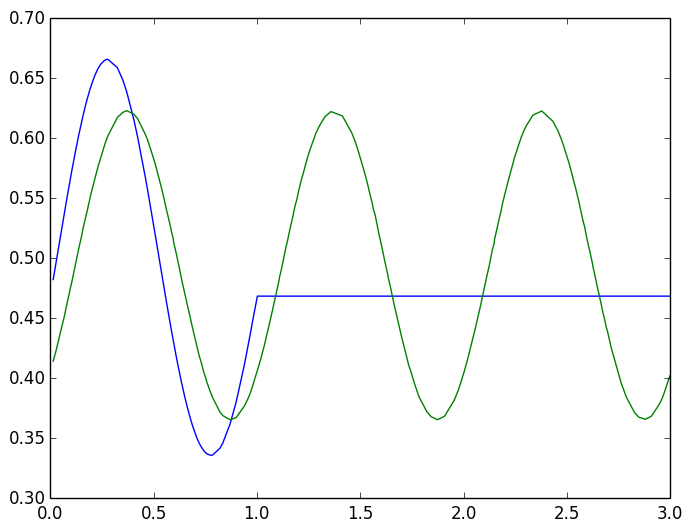

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31be04150>

In [40]:
plot(t_ant,kr_eval)
plot(t_ant,ant_cl)

### 200% scale 


In [41]:
n_span = 12
n_bterm = 40

psi = zeros(n_span)
dpsi = pi/n_span

for i = 1:n_span
    psi[i] = (real(i)-0.5)*dpsi
end

scale = 2.0










2.0

In [42]:
#Run LDVM at all these locations:
alpha_amp = 5*pi/180

h_amp = zeros(n_span)
for i = 1:n_span   
    y_d = -b_d*cos(psi[i])/2.
    h_amp[i] = evaluate(mode_spl,y_d)*scale/c_d
end

dtstar = min(0.015*8,0.015*0.2*2/(k*maximum(h_amp)))
nsteps = round(Int,t_tot/dtstar)+1

alphadef = ConstDef(alpha_amp)
udef = ConstDef(u)
pvt = 0.0 #Doesnt matter, no pitch
lespcrit = [21;] #high value to turn off LEV shedding


W_mat = Array{Float64,2}[]
W_surf = TwoDSurf[]
W_curfield = TwoDFlowField[]

surf_in = TwoDSurf[]
field_in = TwoDFlowField[]
n_in = Int64[]
dt_in = Float64[]
del_in = DelVortDef[]

for i = 1:Int(n_span/2)
    hdef = CosDef(0., h_amp[i], w, 0.)
    full_kinem = KinemDef(alphadef, hdef, udef)
    surf = TwoDSurf("FlatPlate", pvt, full_kinem, lespcrit)
    curfield = TwoDFlowField()
    del = DelVortDef(1, 500, 10)
    push!(surf_in,surf)
    push!(field_in, curfield)
    push!(n_in,nsteps,)
    push!(dt_in,dtstar)
    push!(del_in,del)
end

@time fullsol = pmap((a1,a2,a3,a4,a5)->ldvm(a1,a2,a3,a4),surf_in,field_in,n_in,dt_in,del_in)

for i = 1:Int(n_span/2)
    push!(W_mat,fullsol[i][1])
    push!(W_surf, fullsol[i][2])
    push!(W_curfield, fullsol[i][3])
end
    

10839.095215 seconds (1.61 M allocations: 68.204 MB, 0.00% gc time)


In [43]:

#Mirror image for the rest of the span
for i = Int(n_span/2)+1:n_span
    mt = W_mat[n_span - i + 1]
    st = W_surf[n_span - i + 1]
    ct = W_curfield[n_span - i + 1]
    push!(W_mat, mt)
    push!(W_surf, st)
    push!(W_curfield, ct)
end

lhs = zeros(n_span,n_bterm)
rhs = zeros(n_span)
b_coeff = zeros(nsteps,n_bterm)

dt = W_mat[1][2,1] - W_mat[1][1,1]

cnc_f = zeros(nsteps)
cnnc_f = zeros(nsteps)

bdot = zeros(nsteps,n_bterm)

for i = 1:nsteps
    for j = 1:n_span
        for n = 1:n_bterm
            lhs[j,n] = sin(n*psi[j])*(sin(psi[j]) + (n*pi/(2*AR)))
        end
        rhs[j] = pi*sin(psi[j])*W_mat[j][i,9]/(2*AR)
    end
        
    b_coeff[i,:] = \(lhs, rhs)
    if i >= 2   
        bdot[i,:] = (b_coeff[i,:] - b_coeff[i-1,:])/dt
    end
       
end

a03d = zeros(nsteps,n_span)
cd_ind = zeros(nsteps)
a0dot3d = zeros(nsteps,n_span)


for i = 1:nsteps
    cd_ind[i] = 0
    for n = 1:n_bterm
        cd_ind[i] = cd_ind[i] + real(n)*b_coeff[i,n]^2
    end
    cd_ind[i] = cd_ind[i]*pi*AR
    for j = 1:n_span
        a03d[i,j] = 0
        for n = 1:n_bterm
            a03d[i,j] = a03d[i,j] - real(n)*b_coeff[i,n]*sin(n*psi[j])/sin(psi[j])
            a0dot3d[i,j] = a0dot3d[i,j] - real(n)*bdot[i,n]*sin(n*psi[j])/sin(psi[j])
        end
    end
end

W_alpha = zeros(nsteps,n_span)
W_h = zeros(nsteps,n_span)
W_hdot = zeros(nsteps,n_span)
W_u = zeros(nsteps,n_span)
W_u[:,:] = 1
W_alpha[:,:] = 5*pi/180
for i = 1:nsteps
    for j = 1:n_span
        hdef = CosDef(0., h_amp[j], w, 0.)
        tt = W_mat[1][i,1]    
        W_h[i,j] = hdef(tt)*c
        W_hdot[i,j] = ForwardDiff.derivative(hdef,tt)*u
    end
end

W_cn = zeros(nsteps)
W_cs = zeros(nsteps)
W_cl = zeros(nsteps)
W_cd = zeros(nsteps)
W_cdi = zeros(nsteps)

cn3d = zeros(nsteps, n_span)
cs3d = zeros(nsteps, n_span)
cl3d = zeros(nsteps, n_span)
cd3d = zeros(nsteps, n_span)

for i = 1:nsteps
    W_cn[i] = 0
    W_cs[i] = 0
    for j = 1:n_span
        cn3d[i,j] = W_mat[j][i,10] + (2*pi/u)*(W_u[i,j]*cos(W_alpha[i,j]) + W_hdot[i,j]*sin(W_alpha[i,j]))*a03d[1,j] + (2*pi*c/u)*(3*a0dot3d[i,j]/4)
        cs3d[i,j] = W_mat[j][i,11] + 2*pi*a03d[i,j]^2
        cl3d[i,j] = cn3d[i,j]*cos(W_alpha[i,j]) + cs3d[i,j]*sin(W_alpha[i,j])
        cd3d[i,j] = cn3d[i,j]*sin(W_alpha[i,j]) - cs3d[i,j]*cos(W_alpha[i,j]) 
        W_cn[i] = W_cn[i] + cn3d[i,j]*sin(psi[j])*dpsi/2
        W_cs[i] = W_cs[i] + cs3d[i,j]*sin(psi[j])*dpsi/2
        W_cl[i] = W_cl[i] + cl3d[i,j]*sin(psi[j])*dpsi/2
        W_cd[i] = W_cd[i] + cd3d[i,j]*sin(psi[j])*dpsi/2
    end
end
    

t_th = W_mat[1][:,1]*c_d/u_d

range = round(Int,(ncyc-1)*nsteps/ncyc)+1:nsteps
tbyT = (t_th[range]-t_th[range[1]])/Tn

kr_spl = Spline1D(tbyT,W_cl[range])
kr_eval = evaluate(kr_spl,t_ant)

ant_cl = ant_steady + ant_ocl*scale

len = indmin(abs(t_ant-1))

err = Array(Float64,len)
for i = 1:len
    err[i] = (ant_cl[i] - kr_eval[i])/ant_cl[i] 
end
rms_err = sqrt(mean(err.^2))*100







32.29123244648582

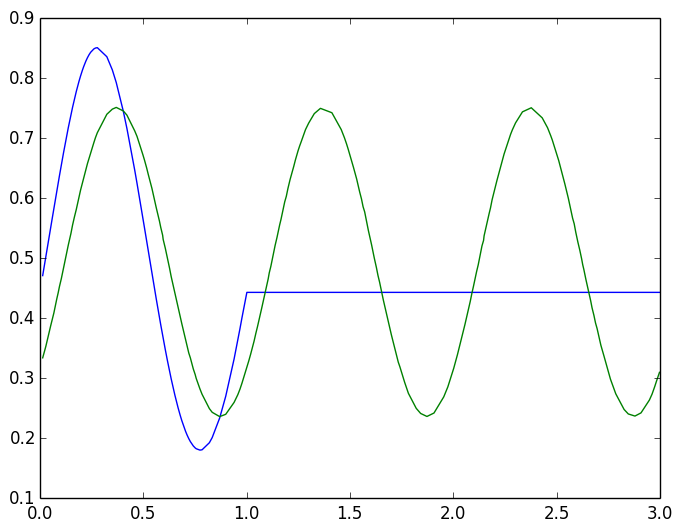

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x314ca7990>

In [44]:
plot(t_ant,kr_eval)
plot(t_ant,ant_cl)